**Exercise**: In Chapter 2 we analyzed the performance of `reachable_nodes` and classified it in  𝑂(𝑛+𝑚) , where  `m`  is the number of nodes and  `m`  is the number of edges. Continuing the analysis, what is the order of growth for `is_connected`?

In [2]:
def is_connected(G):
    start = list(G)[0]
    reachable = reachable_nodes(G, start)
    return len(reachable) == len(G)

`start` gets the first node of the graph, which is constant time. We know that the order of growth of `reachable_nodes` is $O(n+m)$. Lastly, the last line is a conditional that checks whether the number of elements of `reachable_nodes` is equal to the number of elements of the graph, which is also constant time. Thus, the order of growth of `is_connected` is the same as that of `reachable_nodes`, that is $O(n+m)$.

We can check this by using `timeit` to measure the performance time of `reachable_nodes` and `is_connected`.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import seaborn as sns
import timeit

# random seed
np.random.seed(11)

# set node colors
colors = sns.color_palette('pastel', 8)
sns.set_palette(colors)

# function to check the reachable nodes from a starting node in a given graph
def reachable_nodes(G, start):
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(G.neighbors(node))
    return seen

# function to check if the given graph is connected
def is_connected(G):
    start = list(G)[0]
    reachable = reachable_nodes(G, start)
    return len(reachable) == len(G)

In [4]:
# Generate all pairs given the nodes
def all_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i < j:
                yield u,v

# Generates a directed graph given n nodes and edges with probability p
def make_complete_graph(n):
    G = nx.DiGraph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(all_pairs(nodes))
    return G

C:\Users\Carlo\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Carlo\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


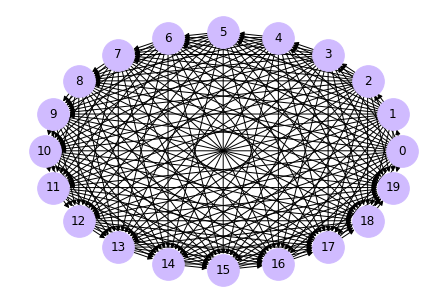

In [5]:
complete = make_complete_graph(20)
nx.draw_circular(complete,
                node_color = 'C4',
                node_size = 1000,
                with_labels = True)

In [24]:
%timeit reachable_nodes(complete,0)

73.4 µs ± 3.12 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [25]:
%timeit is_connected(complete)

76.6 µs ± 6.6 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Thus we see that `reachable_nodes` and `is_connected` have roughly the similar running times and have the same orders of growth.